# Horse Or Human Classifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Creating Training Set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('drive/MyDrive/dataset/horse-or-human/train',
                                                 target_size = (64, 64),
                                                 batch_size = 128,
                                                 class_mode = 'binary')

Found 1027 images belonging to 2 classes.


## Creating Test Set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('drive/MyDrive/dataset/horse-or-human/validation',
                                            target_size = (64, 64),
                                            batch_size = 128,
                                            class_mode = 'binary')

Found 256 images belonging to 2 classes.


## Building CNN Model

In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
9/9 [==============================] - 12s 1s/step - loss: 0.7200 - accuracy: 0.5827 - val_loss: 0.4831 - val_accuracy: 0.8203
Epoch 2/25
9/9 [==============================] - 10s 1s/step - loss: 0.5136 - accuracy: 0.8615 - val_loss: 0.8038 - val_accuracy: 0.7109
Epoch 3/25
9/9 [==============================] - 9s 1s/step - loss: 0.2670 - accuracy: 0.9113 - val_loss: 1.0584 - val_accuracy: 0.8125
Epoch 4/25
9/9 [==============================] - 9s 1s/step - loss: 0.1844 - accuracy: 0.9299 - val_loss: 1.8838 - val_accuracy: 0.6992
Epoch 5/25
9/9 [==============================] - 10s 1s/step - loss: 0.1844 - accuracy: 0.9247 - val_loss: 1.8820 - val_accuracy: 0.7188
Epoch 6/25
9/9 [==============================] - 10s 1s/step - loss: 0.1251 - accuracy: 0.9441 - val_loss: 1.8075 - val_accuracy: 0.7695
Epoch 7/25
9/9 [==============================] - 9s 1s/step - loss: 0.0857 - accuracy: 0.9674 - val_loss: 1.8866 - val_accuracy: 0.7617
Epoch 8/25
9/9 [=====================

## Predicting Single Result

### Predicting Human

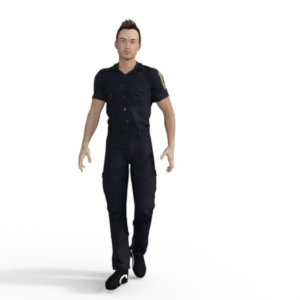

The above image predicted by our model is of Human


In [6]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image
path='drive/MyDrive/dataset/horse-or-human/validation/humans/valhuman01-00.png'
test_image = image.load_img(path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Human'
else:
  prediction = 'Horse'
img=Image(path)
display(img)
print("The above image predicted by our model is of", prediction )

### Predicting Horse

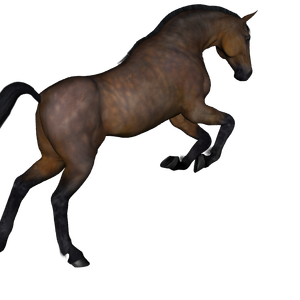

The above image predicted by our model is of Horse


In [7]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image
path='drive/MyDrive/dataset/horse-or-human/validation/horses/horse1-298.png'
test_image = image.load_img(path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Human'
else:
  prediction = 'Horse'
img=Image(path)
display(img)
print("The above image predicted by our model is of", prediction )